In [21]:
import prepare
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [6]:
df = prepare.get_data()


# This will give us stats on bad passwords
df.describe()

,length,num_chars,num_digits,num_upper,num_lower,num_special,num_vowels,num_syllables
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,6.651300,5.030300,1.617600,0.025300,5.005000,0.003400,1.805900,1.606600
std,1.370947,2.804098,2.971911,0.322909,2.809727,0.119958,1.242409,0.681383
min,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,4.000000,0.000000,0.000000,4.000000,0.000000,1.000000,1.000000
50%,7.000000,6.000000,0.000000,0.000000,6.000000,0.000000,2.000000,2.000000
75%,8.000000,7.000000,1.000000,0.000000,7.000000,0.000000,3.000000,2.000000
max,16.000000,13.000000,12.000000,8.000000,13.000000,6.000000,10.000000,6.000000


### On Average:
 - 5 characters
 - 2 digits
 - 5 lowercase letters, but **no uppercase letters**
 - **No special characters**
 - 2 vowels
 - 2 syllables
 
 ____
 
 ### Top 10 overall most common passwords:

In [9]:
df.head(10)['password'].reset_index().rename(columns = {"index" : "Rank", "password" : "Password"})

,Rank,Password
0,0,123456
1,1,password
2,2,12345678
3,3,qwerty
4,4,123456789
5,5,12345
6,6,1234
7,7,111111
8,8,1234567
9,9,dragon


### Top 10 most common lengthy passwords:

In [14]:
df.sort_values("length", ascending = False)['password'].head(10).reset_index().rename(columns = {"index" : "Rank", "password" : "Password"})




,Rank,Password
0,4761,PolniyPizdec0211
1,2201,Mailcreated5240
2,3338,Sojdlg123aljg
3,11,wrongpassword
4,2609,123456qwerty
5,8968,123456789qwe
6,9364,masterbating
7,1239,123qweasdzxc
8,1664,q1w2e3r4t5y6
9,6511,ghjcnjgfhjkm


### Top 10 most common shortest passwords

In [15]:
df.sort_values("length", ascending = True)['password'].head(10).reset_index().rename(columns = {"index" : "Rank", "password" : "Password"})

,Rank,Password
0,4349,sex
1,8186,mad
2,1591,123
3,5214,shao
4,718,1980
5,8025,hung
6,6134,beta
7,8020,junk
8,4760,qiao
9,6146,1949


### Top 10 most common 'odd' passwords

In [16]:
# By number of syllables
df.sort_values("num_syllables", ascending = False)['password'].head(10).reset_index().rename(columns = {"index" : "Rank", "password" : "Password"})

,Rank,Password
0,6047,cccccccc
1,5303,llllllll
2,3973,mmmmmmmm
3,5678,hhhhhhhh
4,7058,mmmmmmm
5,3746,fktrcfylhf
6,8152,sonyericsson
7,9911,qwerasdfzxcv
8,4652,rjycnfynby
9,4297,qwertyqwerty


In [17]:
# By number of special characters
df.sort_values("num_special", ascending = False)['password'].head(10).reset_index().rename(columns = {"index" : "Rank", "password" : "Password"})

,Rank,Password
0,5478,??????
1,7020,******
2,8332,?????
3,4745,*****
4,3332,0.0.0.000
5,2154,0.0.000
6,4517,f**k
7,6896,w_pass
8,6775,sasha_007
9,2537,fuck_inside


___

## How long are the most common passwords?

In [22]:
top = df['length'].value_counts()

x = []
y = []
for i,(a,b) in enumerate(top.iteritems(),1):
    print("Top",'{:<2}'.format(i),":",a,"letters")
    x.append(a)
    y.append(b)
# The graph below suggests that the most common length of password is 6 & 8 words. 

Top 1  : 6 letters
Top 2  : 8 letters
Top 3  : 7 letters
Top 4  : 5 letters
Top 5  : 4 letters
Top 6  : 9 letters
Top 7  : 10 letters
Top 8  : 11 letters
Top 9  : 12 letters
Top 10 : 3 letters
Top 11 : 13 letters
Top 12 : 16 letters
Top 13 : 15 letters


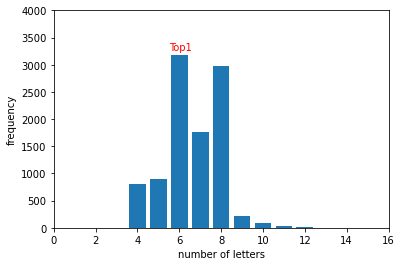

In [23]:
# Let's take a look with bar graph
distribution = pd.DataFrame({'letters':x,'frequency':y})
plt.bar(distribution['letters'].tolist(),distribution['frequency'].tolist())
plt.xlabel('number of letters')
plt.ylabel('frequency')
plt.axis([0,16,0,4000])
highest = df[df['length']==6]['length'].value_counts()
plt.annotate("Top1",xy=(6,highest),xytext=(5.5,highest+100),color='r');

**Most passwords are 6-8 characters long.** Imagine having a password with less than 4 or even 5 characters. That would make it even **easier for a hacker to crack.** This raises the question, **"so how long should a good password be?"** I would say anything over **8 characters would be good, the longer the better.** Longer passwords are generally harder to get into. 

# Sources: 
 - Where I got the dataset info (.csv):
 
    https://www.kaggle.com/shivamb/10000-most-common-passwords